In [1]:
#importing libraries
import pandas as pd
import numpy as np

In [2]:
cat_school = pd.read_csv('https://raw.githubusercontent.com/elisestone/harvard_school_types/main/cat_school_data.csv', delimiter= ';')
num_school = pd.read_csv('https://raw.githubusercontent.com/elisestone/harvard_school_types/main/num_school_data.csv', delimiter= ';')
num_student = pd.read_csv('https://raw.githubusercontent.com/elisestone/harvard_school_types/main/num_student_data.csv', delimiter= ';')
cat_student = pd.read_csv('https://raw.githubusercontent.com/elisestone/harvard_school_types/main/cat_student_data.csv', delimiter= ';')

In [3]:
cat_school_type = cat_school[0:65] #removed the last 65 lines because it was the same info

In [4]:
cat_school_type = cat_school_type.rename(columns={'school': 'schoolID', 'value': 'school_type'}).drop('variable',axis =1) 

In [5]:
num_school= num_school.rename(columns={'school': 'schoolID', 'value': 'schavg'}).drop('variable',axis =1)

In [6]:
student_intake = cat_student[0:3947] #dividing the dataset by type of test/score

In [7]:
student_intake= student_intake.rename(columns={'school': 'schoolID', 'student': 'studentID', 'value': 'intake'}).drop('variable', axis =1)

In [8]:
student_sex = cat_student[3947:7866]

In [9]:
student_sex= student_sex.rename(columns={'school': 'schoolID', 'student': 'studentID', 'value': 'sex'}).drop('variable', axis =1)

In [10]:
student_vr = cat_student[7866:]

In [11]:
student_vr = student_vr.rename(columns={'school': 'schoolID', 'student': 'studentID', 'value': 'vr'}).drop('variable', axis =1)

In [12]:
student_normexam = num_student[0:4059]

In [13]:
student_LRT = num_student[4059:]

In [14]:
student_normexam= student_normexam.rename(columns={'school': 'schoolID', 'student': 'studentID', 'value': 'normexam'}).drop('variable', axis =1)

In [15]:
student_LRT= student_LRT.rename(columns={'school': 'schoolID', 'student': 'studentID', 'value': 'standLRT'}).drop('variable', axis =1)

In [16]:
#merging all the student´s datasets
from functools import partial, reduce

dfs = [student_LRT, student_normexam, student_vr, student_sex, student_intake]
merge = partial(pd.merge, on=['schoolID', 'studentID'], how='outer')
student_data= reduce(merge, dfs)

In [17]:
school_data = cat_school_type.merge(num_school, on= ['schoolID'])

In [18]:
data_full = student_data.merge(school_data, on= ['schoolID'])
data_full #finally the full dataset

,schoolID,studentID,standLRT,normexam,vr,sex,intake,school_type,schavg
0,1,143.0,"0,6190592","0,2613242",mid 50%,F,bottom 25%,mixed,"0,1661752"
1,1,145.0,"0,2058022","0,1340672",mid 50%,F,mid 50%,mixed,"0,1661752"
2,1,142.0,"-1,364576","-1,723882",mid 50%,M,top 25%,mixed,"0,1661752"
3,1,141.0,"0,2058022","0,9675862",mid 50%,F,mid 50%,mixed,"0,1661752"
4,1,138.0,"0,3711052","0,5443412",mid 50%,F,mid 50%,mixed,"0,1661752"
...,...,...,...,...,...,...,...,...,...
4208,65,46.0,"1,8588312",NaN,mid 50%,F,bottom 25%,girls,"-0,23535"
4209,65,59.0,"-1,03397",NaN,mid 50%,F,mid 50%,girls,"-0,23535"
4210,65,60.0,"0,4537562","0,0043222",mid 50%,F,mid 50%,girls,"-0,23535"
4211,65,61.0,"-0,786016","0,0043222",mid 50%,F,mid 50%,girls,"-0,23535"


In [19]:
data_full = data_full.replace(',', '.', regex= True)

In [20]:
data_full['standLRT']= data_full['standLRT'].astype('float64')
data_full['schavg']= data_full['schavg'].astype('float64')

In [21]:
from pycaret.regression import *

s2= setup(data_full, target = 'normexam', numeric_features= ['standLRT', 'schavg'],
        categorical_features= ['vr', 'sex', 'intake', 'school_type', 'schoolID', 'studentID'])

,Description,Value
0,session_id,1590
1,Target,normexam
2,Original Data,"(4213, 9)"
3,Missing Values,True
4,Numeric Features,2
5,Categorical Features,6
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(2897, 611)"


In [22]:
X = get_config('X')

In [23]:
group_data = X.loc[:, 'schoolID_1.0' : 'studentID_not_available'] #schoolID_  and studentID_ are random variables

In [24]:
X = X.drop(group_data, axis= 1)
X.head() #fixed effects covariate data

,standLRT,schavg,vr_bottom 25%,vr_mid 50%,vr_not_available,vr_top 25%,sex_F,sex_M,sex_not_available,intake_bottom 25%,intake_mid 50%,intake_not_available,intake_top 25%,school_type_boys,school_type_girls,school_type_mixed
0,0.619059,0.166175,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.205802,0.166175,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,-1.364576,0.166175,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.205802,0.166175,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.371105,0.166175,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [25]:
y = get_config('y')
y = y.astype(np.float64)

In [26]:
import gpboost as gpb
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
plt.style.use('ggplot')

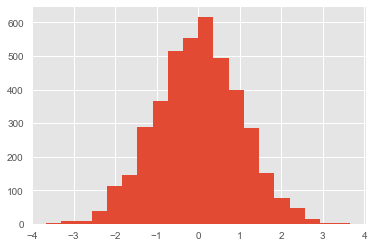

In [27]:
plt.hist(y, bins = 20)
plt.show() #response var with gaussian distribution

In [28]:
#GPBoost is a library that allows for fitting generalized linear mixed effects, which are more appropriate
#on this case since students scores from the same student and institution would be correlated, and simply 
#dropping these features would lead to considerate lost of explanatory power

gp_model = gpb.GPModel(group_data = group_data, likelihood="gaussian") #GLMM with gaussian distribution
gp_model.fit(y=y, X=X)
gp_model.summary()

[GPBoost] [Warning] The covariate data contains no column of ones, i.e., no intercept is included.
Covariance parameters: 
        Error_term  schoolID_1.0  schoolID_10.0  schoolID_11.0  schoolID_12.0  \
Param.    0.581597       0.58122        0.58122        0.58122        0.58122   

        schoolID_13.0  schoolID_14.0  schoolID_15.0  schoolID_16.0  \
Param.        0.58122        0.58122        0.58122        0.58122   

        schoolID_17.0  ...  studentID_91.0  studentID_92.0  studentID_93.0  \
Param.        0.58122  ...        0.419609        0.416928        0.411933   

        studentID_94.0  studentID_95.0  studentID_96.0  studentID_97.0  \
Param.        0.431454        0.414328        0.423308        0.414993   

        studentID_98.0  studentID_99.0  studentID_not_available  
Param.        0.418027         0.41402                 0.417479  

[1 rows x 596 columns]
Linear regression coefficients: 
        Covariate_1  Covariate_2  Covariate_3  Covariate_4  Covariate_5  \
Par

According to the model parameters, school types classified by gender are not good predictors of the normexam score, with boys schools with a slight advantage over girls/only and mixed school types in predicting higher normexam scores. In fact, features such as standLRT and schavg are much better predictors of the target variable, being both positively correlated to it (0.559 and 0.603 parameter estimates, respectively).  